In [1]:
import requests
import re
from textblob import TextBlob

In [2]:
response = requests.get('https://www.yelp.com/biz/contramar-ciudad-de-méxico?osq=Restaurants')

In [3]:
htmlreviewtag = '<span class="lemon--span__373c0__3997G raw__373c0__3rKqk" lang="en">' 
htmlreviewtagend = '</span>'

In [4]:
review = re.search(htmlreviewtag + '(.+?)' + htmlreviewtagend, response.text).group(1)
review

'just reopened from quarantine. great service, amazing food especially tuna tostadas'

In [5]:
htmlCompleto = response.text
indexList = [(element.start(0), element.end(0)) for element in re.finditer(htmlreviewtag + '(.+?)' + htmlreviewtagend, htmlCompleto)] 
indexList

[(231834, 231992),
 (249112, 250986),
 (271041, 272061),
 (293578, 294819),
 (318309, 320463),
 (342606, 343216),
 (366948, 369347),
 (391486, 392842),
 (414930, 415936),
 (437190, 438650),
 (460562, 461094),
 (482380, 483643),
 (504972, 505898),
 (529189, 529691),
 (553178, 553695),
 (575185, 576273),
 (597595, 599016),
 (616349, 616824),
 (635924, 638107),
 (661597, 662324)]

In [7]:
for index in indexList:
  inf = index[0]
  sup = index[1]
  review = htmlCompleto[inf + len(htmlreviewtag): sup -  len(htmlreviewtagend)]
  print(review)
  print('---')

just reopened from quarantine. great service, amazing food especially tuna tostadas
---
This came recommended by literally every single person I know that went to Mexico City. Definitely book your reservation in advance or come early. If you are traveling and here during the week, there&#39;s barley any line when we went and we had a reservation at 12. Definitely choose the patio table! <br><br>We opted for the tostada atun. Honestly I wish I did two orders. They come with four but I would have easily ate four. That&#39;s really all you need to get! <br><br>Being the Americans we are, we wanted to try more because were like, this won&#39;t fill me up and more like everyone else in the world, WE WERE ON VACATION! In addition to the tostada, we got the: contra ceviche, atun appetizer (which was as basically sashimi with some type of soy sauce dressing but want overly soy sauce) - that one was really good and the fish was extremely fresh. The ceviche left for something to be desired. It c

In [8]:
tagN = '<p class="lemon--p__373c0__3Qnnj text__373c0__2U54h text-color--mid__373c0__27i5f text-align--left__373c0__1Uy60 text-size--large__373c0__1j9OF">'
tagNEnd = ' reviews</p>'

In [9]:
totalReviews = re.search(tagN + '(.+?)' + tagNEnd, response.text).group(1)
totalReviews

'382'

In [10]:
totalPags = int(totalReviews)/20
totalPags = int(totalPags)
totalPags

19

In [11]:
allReviews = []

for pageNum in range(0, int(totalReviews), 20):
    URL = 'https://www.yelp.com/biz/contramar-ciudad-de-méxico?osq=Restaurants&start='+str(pageNum)
    response = requests.get(URL)
    initText = '<span class="lemon--span__373c0__3997G raw__373c0__3rKqk" lang="en">' 
    endText = '</span>'
    try:
        review = re.search(initText + '(.+?)' + endText, response.text).group(1)
        indexList = [(element.start(0), element.end(0)) for element in re.finditer(initText + '(.+?)' + endText, response.text)] 
        completHtml = response.text
        for index in indexList:
            inf = index[0]
            sup = index[1]
            review = completHtml[inf + len(initText): sup -  len(endText)]
            allReviews.append(review)
    except:
        pass

In [12]:
for index, review in enumerate(allReviews):
    review = review.replace('<br>', '')
    review = review.replace('&#39;', "'")
    review = review.replace(u'\xa0', " ")
    review = review.lower()
    review = review.rstrip('\n')
    allReviews[index] = review

In [13]:
allReviews[200]

'this place was recommended to us by many people who we otherwise respect. we made the reservation months in advance. we were running late, so we were sprinting through the streets of mexico city terrified that we would lose our coveted table. we arrived filled with excitement. it was....totally mediocre and one of the less flavorful meals we had in mexico. sure the tuna tostada is good - melt in your mouth high sushi quality, but by no means life changing. we had the shrimp tostada that was totally bland and had a mayo feel. we also got the bean tostada that was, again, totally bland. the meal was by far our most expensive on mexico and our most disappointing. the space is cool enough, but definitely not worth the hype.'

In [14]:
len(allReviews)

345

In [16]:
polarities = []
subjs = []
label = []

for review in allReviews:
    sentimiento = TextBlob(review)
    polarities.append(sentimiento.polarity)
    subjs.append(sentimiento.subjectivity)

    if (sentimiento.polarity > 0):
        label.append('positivo')
    elif (sentimiento.polarity < 0):
        label.append('negativo')
    else:
        label.append('neutro')


In [17]:
import pandas as pd

dataOut = pd.DataFrame({'polaridad': polarities, 'subje':subjs, 'etiqueta': label})
dataOut.head()

,polaridad,subje,etiqueta
0,0.466667,0.883333,positivo
1,0.291036,0.435072,positivo
2,0.186111,0.535317,positivo
3,0.281443,0.525843,positivo
4,0.345814,0.591208,positivo


In [31]:
dataOut.describe()

,polaridad,subje
count,345.000000,345.000000
mean,0.329279,0.569261
std,0.174633,0.120279
min,-0.418750,0.243750
25%,0.221332,0.500000
50%,0.318333,0.560902
75%,0.425000,0.622619
max,1.000000,1.000000


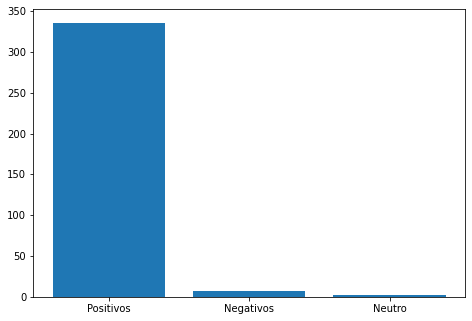

In [27]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Positivos', 'Negativos', 'Neutro']
students = [len(dataOut[dataOut['etiqueta'] == 'positivo']),len(dataOut[dataOut['etiqueta'] == 'negativo']), len(dataOut[dataOut['etiqueta'] == 'neutro'])]
ax.bar(langs,students)
plt.show()

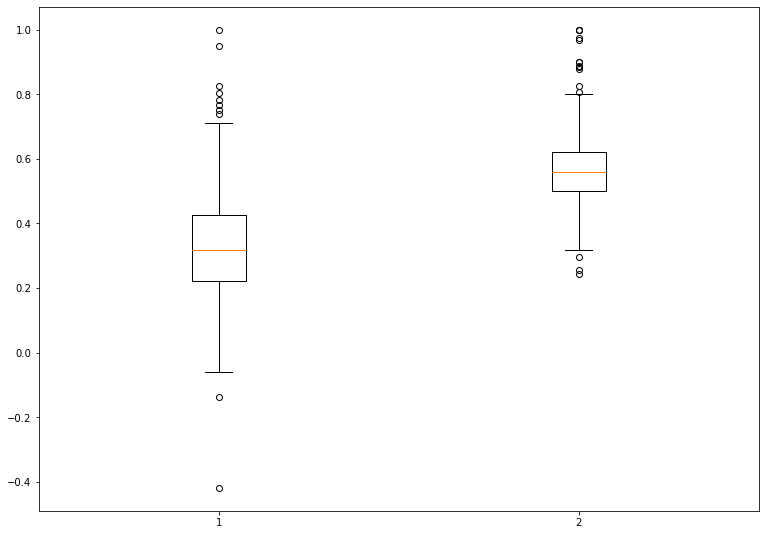

In [29]:
fig = plt.figure(figsize =(10, 7)) 
ax = fig.add_axes([0, 0, 1, 1]) 
bp = ax.boxplot([dataOut['polaridad'], dataOut['subje']]) 
plt.show() 

# Conclusiones Comentarios
Los resultados demuestran que el restaurante es bastante bueno ya que tienen muchos mas resultados positivos que negativos o neutros esto junto con el analisis de polaridad el cual tiene un promedio de 0.32 con la mayoria de outliers en la parte superior nos indica que la mayoria de personas escribio en una forma positiva, de igual forma la subjetividad se encuentra en el area media como visto en el boxplot por lo cual se asume que los reviews fueron subjetivos y no basados en opinion personal 